<a href="https://colab.research.google.com/github/vvsrupesh/Colab-Notebooks/blob/main/significance_of_every_categorical_column.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [ ]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')


In [ ]:
churn_df = churn_master_df.copy()

In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [ ]:
churn_df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [ ]:
print('Rows               :', churn_df.shape[0])
print('Columns            :', churn_df.shape[1])
print('\nFeatures            :', churn_df.columns.tolist())
print('\nUnique values count :\n', churn_df.nunique())


Rows               : 7043
Columns            : 10

Features            : ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values count :
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


In [ ]:
churn_df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


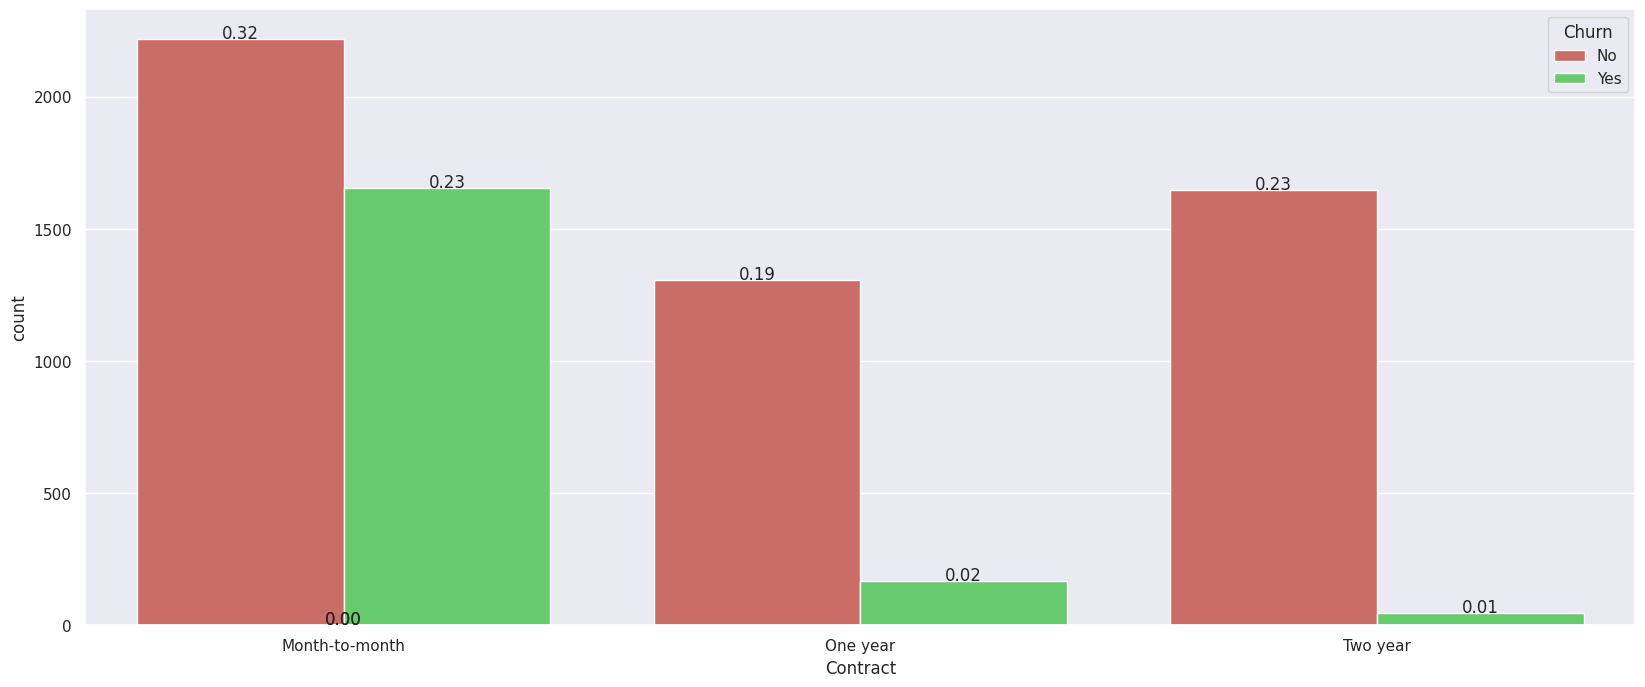

In [ ]:
sns.set(style ="darkgrid")
sns.set_palette("hls", 3)
fig, ax =plt.subplots(figsize = (20,8))
ax = sns.countplot(x ="Contract", hue = "Churn", data= churn_df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height + 3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha ="center")

In [ ]:
pd.crosstab(index = churn_df['Contract'], columns = churn_df['Churn'],margins =True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [ ]:
Contract_churn_ct = pd.crosstab(index = churn_df['Contract'], columns = churn_df['Churn'])

In [ ]:
Contract_churn_ct

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [ ]:
Contract_churn_ct.iloc[0].values

array([2220, 1655])

In [ ]:
from scipy import stats

(chi2, p, dof,_) = stats.chi2_contingency([Contract_churn_ct.iloc[0].values,Contract_churn_ct.iloc[1].values,Contract_churn_ct.iloc[2].values])

In [ ]:
print("chi2 :", chi2)
print("p    :", p)
print("dof  :", dof)


#here chi value should be very big but in this case its not at all useful
#as well as chi2 value is very minimum.

chi2 : 1184.5965720837926
p    : 5.863038300673391e-258
dof  : 2


In [ ]:
# crammer V

np.sqrt(chi2/(churn_df.shape[0]))

0.4101156965761409

In [ ]:
churn_df['PaperlessBilling'].value_counts()


,count
PaperlessBilling,
Yes,4171
No,2872


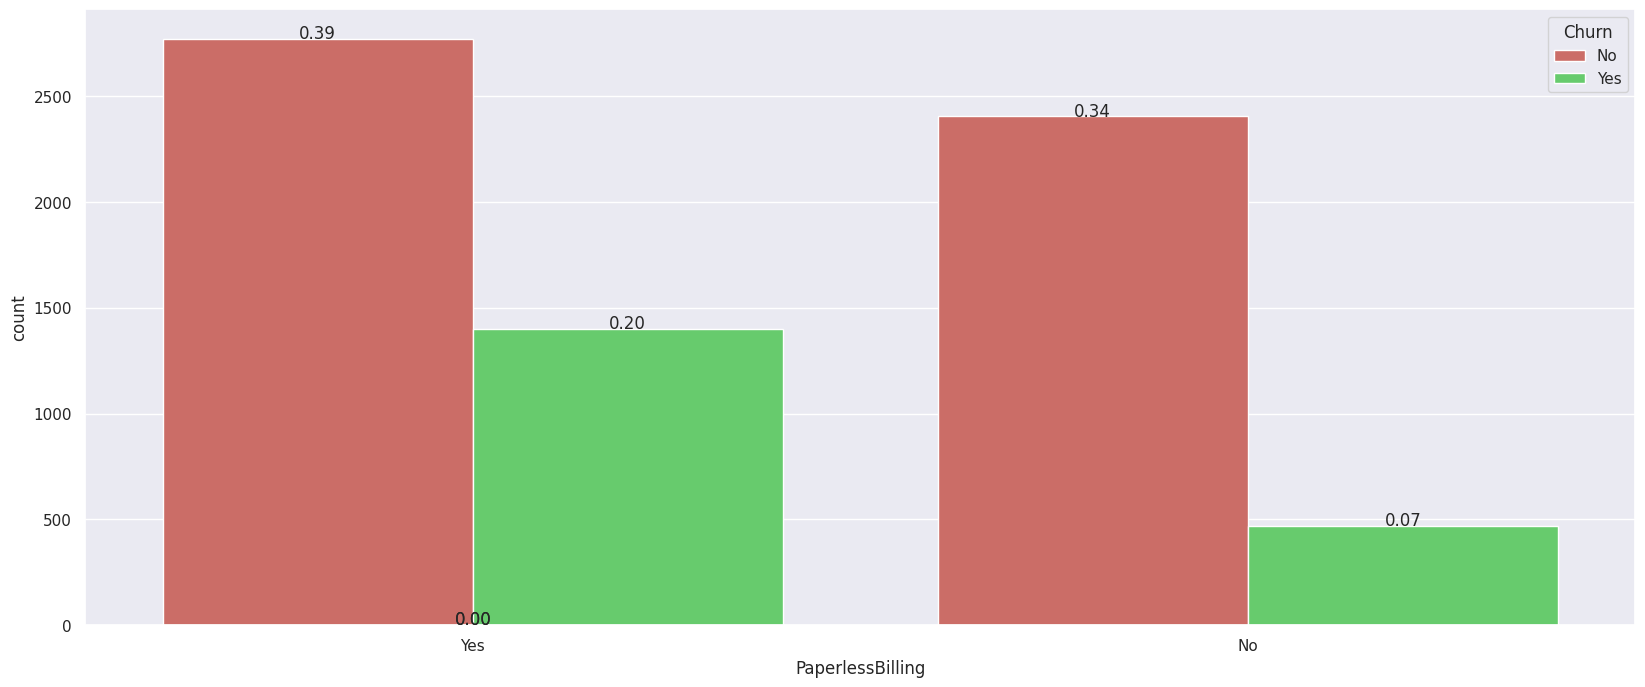

In [ ]:
sns.set(style ="darkgrid")
sns.set_palette("hls", 3)
fig, ax =plt.subplots(figsize = (20,8))
ax = sns.countplot(x ="PaperlessBilling", hue = "Churn", data= churn_df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height + 3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha ="center")

In [ ]:
pd.crosstab(index = churn_df['PaperlessBilling'], columns = churn_df['Churn'],margins =True)

Churn,No,Yes,All
PaperlessBilling,,,
No,2403,469,2872
Yes,2771,1400,4171
All,5174,1869,7043


In [ ]:
pb_churn_ct = pd.crosstab(index = churn_df['PaperlessBilling'], columns = churn_df['Churn'])

In [ ]:
pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [ ]:
pb_churn_ct.iloc[0].values

array([2403,  469])

In [ ]:
from scipy import stats

(chi2, p, dof,_) = stats.chi2_contingency([pb_churn_ct.iloc[0].values,pb_churn_ct.iloc[1].values,])

In [ ]:
print("chi2 :", chi2)
print("p    :", p)
print("dof  :", dof)


#here chi value should be very big but in this case its not at all useful
#as well as chi2 value is very minimum.

chi2 : 258.27764906707307
p    : 4.073354668665985e-58
dof  : 1


In [ ]:
# crammer V

np.sqrt(chi2/(churn_df.shape[0]))

0.19149814355338285

In [ ]:
churn_df['gender'].value_counts()


,count
gender,
Male,3555
Female,3488


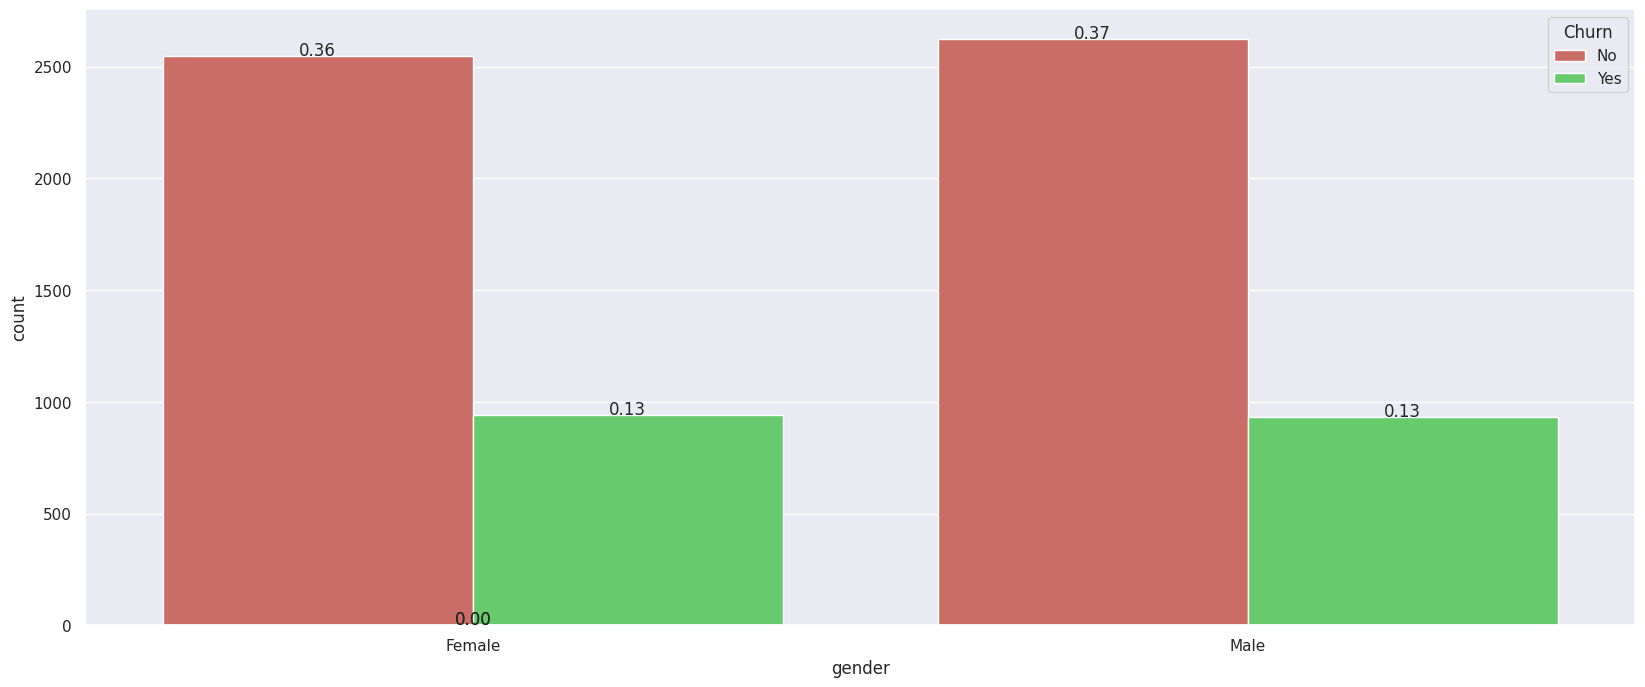

In [ ]:
sns.set(style ="darkgrid")
sns.set_palette("hls", 3)
fig, ax =plt.subplots(figsize = (20,8))
ax = sns.countplot(x ="gender", hue = "Churn", data= churn_df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height + 3,
          '{:1.2f}'.format(height/churn_df.shape[0]),
          ha ="center")

In [ ]:
pd.crosstab(index = churn_df['gender'], columns = churn_df['Churn'],margins =True)

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


In [ ]:
g_churn_ct = pd.crosstab(index = churn_df['gender'], columns = churn_df['Churn'])

In [ ]:
g_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [ ]:
g_churn_ct.iloc[0].values

array([2549,  939])

In [ ]:
from scipy import stats

(chi2, p, dof,_) = stats.chi2_contingency([g_churn_ct.iloc[0].values,g_churn_ct.iloc[1].values,])

In [ ]:
print("chi2 :", chi2)
print("p    :", p)
print("dof  :", dof)


#here chi value should be very big but in this case its not at all useful
#as well as chi2 value is very minimum.

chi2 : 0.4840828822091383
p    : 0.48657873605618596
dof  : 1


In [ ]:
# crammer V

np.sqrt(chi2/(churn_df.shape[0]))

0.008290505631771371